In [348]:
import soundfile as sf

# Load the audio file
data, samplerate = sf.read('Bat.ogg')

# Print the shape of the array
print("Shape of the audio array:", data.shape)

# Select only one channel (the first channel in this example)
mono_data = data[:, 0] if data.ndim > 1 else data

# Print the shape of the mono audio array
print("Shape of the mono audio array:", mono_data.shape)


Shape of the audio array: (7872, 2)
Shape of the mono audio array: (7872,)


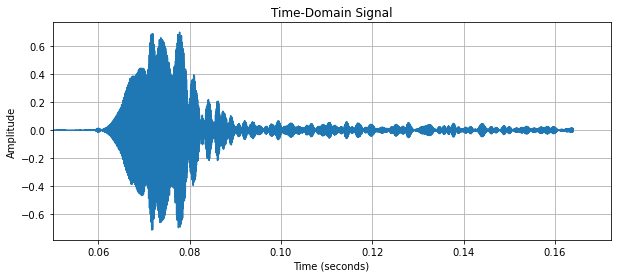

In [349]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the time for each sample
num_samples = len(mono_data)
time_array = np.arange(num_samples) / samplerate

# Plotting
# Re-plotting the signal with the specifications and exporting the plot

# Reusing the previous settings for the plot
plt.figure(figsize=(10, 4))
plt.plot(time_array, mono_data)
plt.xlim(0.05)  # Setting the x-axis limit
plt.title('Time-Domain Signal')  # Title of the plot
plt.xlabel('Time (seconds)')  # X-axis label
plt.ylabel('Amplitude')  # Y-axis label
plt.grid(True)

# Exporting the plot as an image file
plot_file_path = 'time_domain_signal_plot.png'
plt.savefig(plot_file_path)

# Displaying the plot in the output
plt.show()



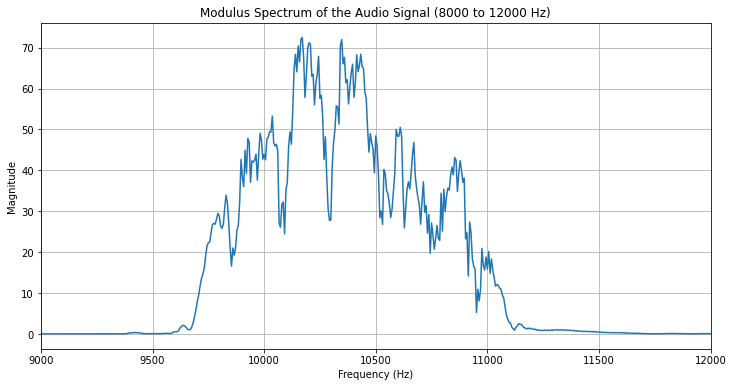

In [350]:
# Load the audio file and convert it to mono if it's stereo
data, samplerate = sf.read('Bat.ogg')
mono_data = data[:, 0] if data.ndim > 1 else data

# Compute the Fourier Transform
fft_result = np.fft.fft(mono_data)
fft_freqs = np.fft.fftfreq(len(fft_result), 1/samplerate)

# Compute the modulus (absolute value) of the Fourier Transform
fft_magnitude = np.abs(fft_result)

# Plot the modulus spectrum for the specific frequency range
plt.figure(figsize=(12, 6))
plt.plot(fft_freqs[:len(fft_result)//2], fft_magnitude[:len(fft_result)//2]) # Plot only the positive frequencies
plt.xlim(9000, 12000) # Limit the x-axis to the range 8000 to 12000 Hz
plt.title("Modulus Spectrum of the Audio Signal (8000 to 12000 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plot_file_path1 = 'modulus_spectrum.png'
plt.savefig(plot_file_path1)
plt.show()




In [351]:
lower_bound = 9500
upper_bound = 11500
filtered_indices = np.where((fft_freqs >= lower_bound) & (fft_freqs <= upper_bound))

# Extract the relevant frequency and magnitude data
filtered_freqs = fft_freqs[filtered_indices]
filtered_magnitude = np.abs(fft_result)[filtered_indices]
output_file_path = "modulus.dat"

In [352]:
# Print a portion of the Fourier transform data
num_points_to_print = 10  # You can adjust this number
print("Frequency (Hz)\tMagnitude")
for i in range(num_points_to_print):
    print(f"{fft_freqs[i]:.2f}\t\t{fft_magnitude[i]:.2f}")

# Interpretation
print("\nInterpretation:")
print("Frequencies close to 0 Hz represent the low-frequency components of the audio.")
print("Higher magnitude values indicate stronger frequency components in the audio signal.")
print("Peaks in the spectrum (high magnitude values) indicate dominant frequencies.")


Frequency (Hz)	Magnitude
0.00		0.10
6.10		0.12
12.20		0.29
18.29		0.07
24.39		0.17
30.49		0.05
36.59		0.09
42.68		0.03
48.78		0.06
54.88		0.08

Interpretation:
Frequencies close to 0 Hz represent the low-frequency components of the audio.
Higher magnitude values indicate stronger frequency components in the audio signal.
Peaks in the spectrum (high magnitude values) indicate dominant frequencies.


The most prominent frequency in the bat sound is approximately 10157.68 Hz.


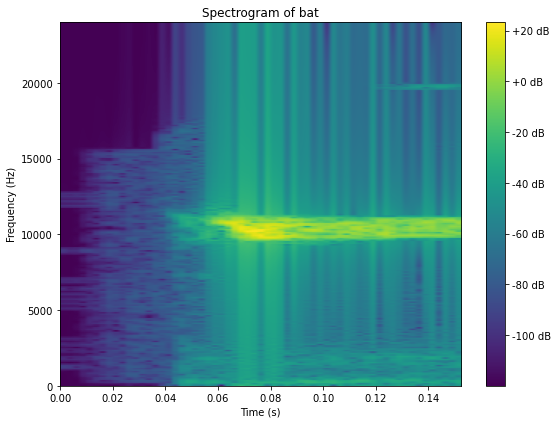

In [353]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Function to compute the spectrogram
def compute_spectrogram(file_name, window_duration=0.01):  # window_duration in seconds
    data, samplerate = sf.read(file_name)
    if len(data.shape) > 1 and data.shape[1] == 2:
        data = data.mean(axis=1)

    window_size = int(samplerate * window_duration)  # Convert window duration to samples
    step_size = window_size // 4
    window_function = np.hamming(window_size)
    number_of_shifts = (len(data) - window_size) // step_size
    
    spectrogram_matrix = np.zeros((window_size // 2 + 1, number_of_shifts))

    for i in range(number_of_shifts):
        start = i * step_size
        end = start + window_size
        segment = data[start:end] * window_function
        fft_result = np.fft.rfft(segment)
        spectrogram_matrix[:, i] = np.abs(fft_result)

    return spectrogram_matrix, samplerate, step_size

# Compute the spectrogram for the 'Bat.ogg' file
spectrogram, sr, step_size = compute_spectrogram('Bat.ogg')

# Sum the energy across time for each frequency
frequency_energy_sum = np.sum(spectrogram, axis=1)

# Identify the most prominent frequency
most_prominent_frequency_index = np.argmax(frequency_energy_sum)
most_prominent_frequency = most_prominent_frequency_index * sr / (2 * len(frequency_energy_sum))

# Print the most prominent frequency
print(f"The most prominent frequency in the bat sound is approximately {most_prominent_frequency:.2f} Hz.")

# Plot the spectrogram with correct axes
plt.figure(figsize=(8, 6))
time_axis_length = spectrogram.shape[1] * step_size / sr  # Total duration of the time axis
frequency_axis_length = sr / 2  # Nyquist frequency, maximum frequency represented

plt.imshow(
    20 * np.log10(spectrogram + 1e-6),  # in dB
    aspect='auto',
    origin='lower',
    extent=[0, time_axis_length, 0, frequency_axis_length],
    cmap='viridis'
)

# Finalize plot
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of bat')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

plot_file_path2 = 'spectrogram.png'
plt.savefig(plot_file_path2)
plt.show()



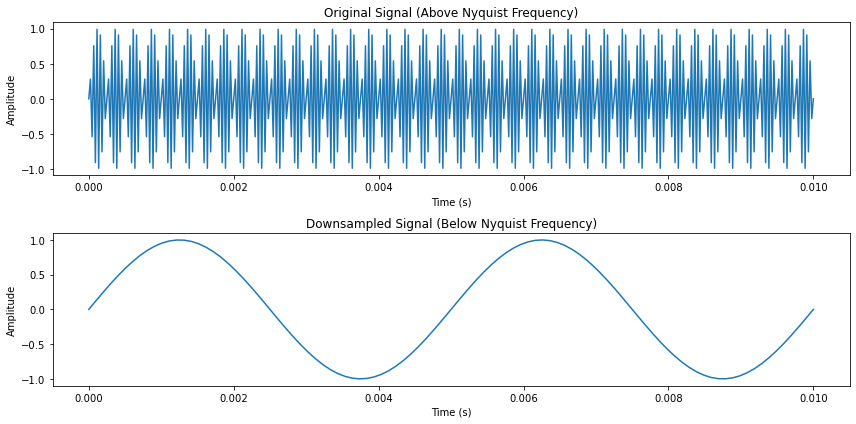

In [354]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
frequency = 20000  # Frequency of the sine wave in Hz (above the Nyquist frequency)
duration = 0.01   # Duration of the signal in seconds

# Create a time vector
t = np.linspace(0, duration, int(44100 * duration))  # Sampling rate of 44100 Hz

# Generate the sine wave signal
signal = np.sin(2 * np.pi * frequency * t)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal (Above Nyquist Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Downsample the signal to a lower sampling rate
new_sampling_rate = 10000  # Below the Nyquist frequency
t_downsampled = np.linspace(0, duration, int(new_sampling_rate * duration))
signal_downsampled = np.sin(2 * np.pi * frequency * t_downsampled)

# Plot the downsampled signal
plt.subplot(2, 1, 2)
plt.plot(t_downsampled, signal_downsampled)
plt.title('Downsampled Signal (Below Nyquist Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


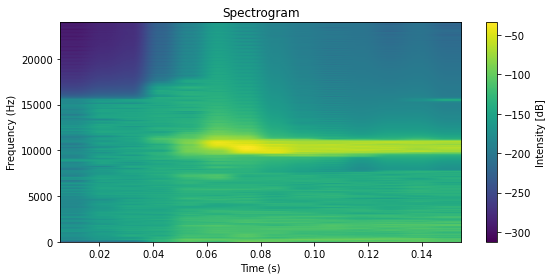

In [355]:
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
data, samplerate = sf.read('Bat.ogg')

# Play the audio (using the first channel in case of stereo)
Audio(data[:, 0] if data.ndim > 1 else data, rate=samplerate)

# Select only one channel for analysis
mono_data = data[:, 0] if data.ndim > 1 else data

# Plotting
plt.figure(figsize=(8, 4))  # Create a new figure for the spectrogram
Pxx, freqs, bins, im = plt.specgram(mono_data, NFFT=1024, Fs=samplerate, noverlap=512)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.colorbar(im).set_label('Intensity [dB]')
plt.tight_layout()
plt.show()


In [356]:
pip install sounddevice


Note: you may need to restart the kernel to use updated packages.


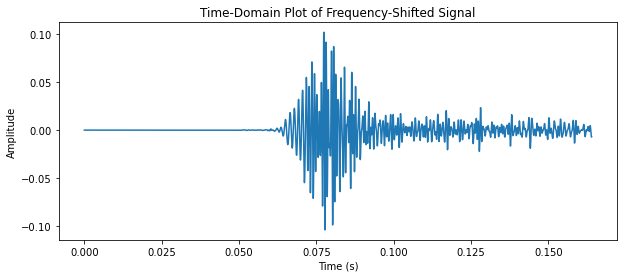

In [357]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


# Convert stereo to mono if necessary
if data.shape[1] == 2:
    data = data.mean(axis=1)

# Choose a frequency for the sine wave
sine_freq = 11500  # Example frequency, adjust as needed

# Generate a sine wave
time = np.arange(len(data)) / samplerate
sine_wave = np.sin(2 * np.pi * sine_freq * time)

# Mix the original signal with the sine wave
mixed_signal = data * sine_wave

# Apply a low-pass filter
# Choose a cutoff frequency that is slightly above the expected lower frequency component
cutoff_freq = 2000  # Example cutoff, adjust as needed
filtered_signal = signal.lfilter(*signal.butter(2, cutoff_freq / (samplerate / 2)), mixed_signal)

# Plot the resulting time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_signal)
plt.title("Time-Domain Plot of Frequency-Shifted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plot_file_path3 = 'shifted_time_domain.png'
plt.savefig(plot_file_path3)
plt.show()

# Define the output file path
output_file_path = "frequency_shifted_signal.dat"

# Export the processed signal to a .dat file
np.savetxt(output_file_path, filtered_signal)


In [358]:
import numpy as np
import pandas as pd

# Frequency ranges for each species in Hz
frequency_ranges = {
    "Little Brown Bat (Myotis lucifugus)": (20000, 110000),
    "Big Brown Bat (Eptesicus fuscus)": (20000, 60000),
    "Mexican Free-tailed Bat (Tadarida brasiliensis)": (25000, 50000),
    "Greater Horseshoe Bat (Rhinolophus ferrumequinum)": (75000, 110000),
    "Lesser Horseshoe Bat (Rhinolophus hipposideros)": (90000, 115000),
    "Soprano Pipistrelle (Pipistrellus pygmaeus)": (55000, 85000),
    "Common Pipistrelle (Pipistrellus pipistrellus)": (45000, 70000),
    "Spotted Bat (Euderma maculatum)": (15000, 50000)
}
noise_level = 0

# Generating random frequency datasets for each species
synthetic_data_with_noise = {species: np.random.uniform(low_freq, high_freq, 125) * (1 + np.random.normal(0, noise_level, 125)) for species, (low_freq, high_freq) in frequency_ranges.items()}

# Converting the synthetic datasets to pandas DataFrames
synthetic_dataframes = {species: pd.DataFrame(data, columns=['Frequency (Hz)']) for species, data in synthetic_data_with_noise.items()}


In [359]:
import pandas as pd
# Combining all dataframes into a single dataframe with an additional column for species
combined_df = pd.concat(
    [df.assign(Bat_Species=species) for species, df in synthetic_dataframes.items()],
    ignore_index=True
)

# Reordering columns for the format (bat species, frequency)
combined_df = combined_df[['Frequency (Hz)', 'Bat_Species']]

# Path for the .dat file
file_path = 'bat_species_frequencies.dat'

# Exporting the dataframe to a .dat file
combined_df.to_csv(file_path, index=False, sep='\t')


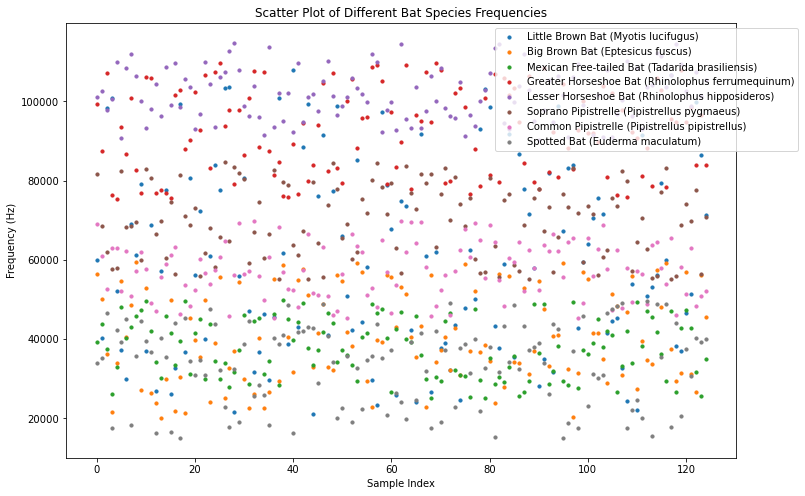

In [360]:
plt.figure(figsize=(12, 8))  # Making the plot larger

for species, df in synthetic_dataframes.items():
    plt.scatter(df.index, df['Frequency (Hz)'], label=species, s=10)  # Making scatter points smaller

plt.xlabel('Sample Index')
plt.ylabel('Frequency (Hz)')
plt.title('Scatter Plot of Different Bat Species Frequencies')
plt.legend(loc='upper right', bbox_to_anchor=(1.10, 1))  # Moving the legend outside the plot

plot_file_path4 = 'bat_species_freq.png'
plt.savefig(plot_file_path4)

plt.show()


In [361]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Load the dataset
data = pd.read_csv('bat_species_frequencies.dat', sep='\t')
# Randomize the order of the dataset
data = shuffle(data)
# Separate features and target variable
X = data[['Frequency (Hz)']]  # Features
y = data['Bat_Species']       # Target

# Encoding the species names to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Bat_Species'])

# Splitting the dataset (make sure X contains only numeric features)
X = data[['Frequency (Hz)']]  # Features
y = y_encoded                # Encoded Target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a SVM Classifier
model = SVC(kernel='linear')  # You can experiment with different kernels

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 3  0  0  0  5  4  0  8]
 [ 8  6  0  0  1  0 14  0]
 [ 0  0  8 17  0  0  3  0]
 [ 0  0  7 21  0  0  0  0]
 [ 5  2  4  1  1  1  2  3]
 [10  0  0  0  0 12  0  5]
 [ 0  3  9  0  1  0 12  0]
 [ 7  0  0  0  0  6  0 11]]
              precision    recall  f1-score   support

           0       0.09      0.15      0.11        20
           1       0.55      0.21      0.30        29
           2       0.29      0.29      0.29        28
           3       0.54      0.75      0.63        28
           4       0.12      0.05      0.07        19
           5       0.52      0.44      0.48        27
           6       0.39      0.48      0.43        25
           7       0.41      0.46      0.43        24

    accuracy                           0.37       200
   macro avg       0.36      0.35      0.34       200
weighted avg       0.38      0.37      0.36       200



In [362]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


[[ 4  4  0  0  3  4  2  3]
 [ 5  9  0  0  0  2 12  1]
 [ 0  0 13 10  3  0  2  0]
 [ 0  0  9 18  1  0  0  0]
 [ 3  2  2  1  1  3  4  3]
 [ 7  2  0  0  3  8  0  7]
 [ 1  2 10  0  4  0  8  0]
 [ 6  1  0  0  4  4  0  9]]
              precision    recall  f1-score   support

           0       0.15      0.20      0.17        20
           1       0.45      0.31      0.37        29
           2       0.38      0.46      0.42        28
           3       0.62      0.64      0.63        28
           4       0.05      0.05      0.05        19
           5       0.38      0.30      0.33        27
           6       0.29      0.32      0.30        25
           7       0.39      0.38      0.38        24

    accuracy                           0.35       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.36      0.35      0.35       200



In [363]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GBM Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
gbm_predictions = gbm_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, gbm_predictions))
print(classification_report(y_test, gbm_predictions))


[[ 2  6  0  0  3  3  2  4]
 [ 3 13  0  0  0  1 10  2]
 [ 0  0 15 12  0  0  1  0]
 [ 0  0  9 19  0  0  0  0]
 [ 2  1  3  1  1  4  5  2]
 [ 8  4  0  0  0  5  0 10]
 [ 1  2  9  0  0  0 13  0]
 [ 3  1  0  0  3  7  0 10]]
              precision    recall  f1-score   support

           0       0.11      0.10      0.10        20
           1       0.48      0.45      0.46        29
           2       0.42      0.54      0.47        28
           3       0.59      0.68      0.63        28
           4       0.14      0.05      0.08        19
           5       0.25      0.19      0.21        27
           6       0.42      0.52      0.46        25
           7       0.36      0.42      0.38        24

    accuracy                           0.39       200
   macro avg       0.35      0.37      0.35       200
weighted avg       0.36      0.39      0.37       200



In [364]:
unknown_bat_frequency = [[most_prominent_frequency]]

# If you normalized your training data, normalize this new data as well
unknown_bat_frequency_normalized = scaler.transform(unknown_bat_frequency)

# Use the trained model to make a prediction
predicted_species_code = rf_classifier.predict(unknown_bat_frequency_normalized)

# Decode the predicted species code back to the species name
predicted_species = label_encoder.inverse_transform(predicted_species_code)
print(f"The predicted species for the bat with frequency {unknown_bat_frequency[0][0]} Hz is {predicted_species[0]}.")


The predicted species for the bat with frequency 10157.676348547719 Hz is Spotted Bat (Euderma maculatum).


/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [365]:
from sklearn.svm import SVC

# Assuming your training data is already prepared in X_train and y_train
# Create the SVM model with probability enabled
svm_classifier = SVC(probability=True)

# Train the model
svm_classifier.fit(X_train, y_train)

# Now you can use svm_classifier to predict probabilities
svm_probabilities = svm_classifier.predict_proba(unknown_bat_frequency_normalized)


unknown_bat_frequency = [[most_prominent_frequency]]

# Normalize if necessary
unknown_bat_frequency_normalized = scaler.transform(unknown_bat_frequency)

# SVM prediction (make sure your SVM model was trained with probability=True)
svm_probabilities = svm_classifier.predict_proba(unknown_bat_frequency_normalized)

# Random Forest prediction
rf_probabilities = rf_classifier.predict_proba(unknown_bat_frequency_normalized)

# GBM prediction
gbm_probabilities = gbm_classifier.predict_proba(unknown_bat_frequency_normalized)

# Convert the probabilities to percentages and map them to species names
species_names = label_encoder.classes_
svm_species_prob = dict(zip(species_names, svm_probabilities[0]))
rf_species_prob = dict(zip(species_names, rf_probabilities[0]))
gbm_species_prob = dict(zip(species_names, gbm_probabilities[0]))

# Print results
print("SVM Probabilities:", svm_species_prob)
print("Random Forest Probabilities:", rf_species_prob)
print("GBM Probabilities:", gbm_species_prob)


SVM Probabilities: {'Big Brown Bat (Eptesicus fuscus)': 0.25666335901886955, 'Common Pipistrelle (Pipistrellus pipistrellus)': 0.011387711492426995, 'Greater Horseshoe Bat (Rhinolophus ferrumequinum)': 0.015209513833264103, 'Lesser Horseshoe Bat (Rhinolophus hipposideros)': 0.008704720991345035, 'Little Brown Bat (Myotis lucifugus)': 0.17568522131664716, 'Mexican Free-tailed Bat (Tadarida brasiliensis)': 0.0453134219389191, 'Soprano Pipistrelle (Pipistrellus pygmaeus)': 0.027083823891486534, 'Spotted Bat (Euderma maculatum)': 0.4599522275170413}
Random Forest Probabilities: {'Big Brown Bat (Eptesicus fuscus)': 0.0, 'Common Pipistrelle (Pipistrellus pipistrellus)': 0.0, 'Greater Horseshoe Bat (Rhinolophus ferrumequinum)': 0.0, 'Lesser Horseshoe Bat (Rhinolophus hipposideros)': 0.0, 'Little Brown Bat (Myotis lucifugus)': 0.0, 'Mexican Free-tailed Bat (Tadarida brasiliensis)': 0.0, 'Soprano Pipistrelle (Pipistrellus pygmaeus)': 0.0, 'Spotted Bat (Euderma maculatum)': 1.0}
GBM Probabilitie

/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
